<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/03_central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
%matplotlib inline

In [10]:
n_experiments = 100 # L
sample_size = 50 # N
rolls = np.random.randint(1, 7, size=(n_experiments, sample_size))
rolls

array([[6, 1, 4, ..., 6, 4, 3],
       [6, 6, 4, ..., 5, 2, 6],
       [4, 6, 2, ..., 5, 6, 2],
       ...,
       [4, 5, 1, ..., 4, 5, 3],
       [6, 1, 4, ..., 6, 6, 4],
       [2, 5, 6, ..., 3, 3, 2]])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display

def plot_clt_dice(sample_size, n_experiments):
    """
    Simulates rolling 'sample_size' dice 10,000 times.
    Plots the distribution of the sample means.
    """
    #n_experiments = 10000

    # 1. Simulate the data
    # np.random.randint(1, 7) rolls a standard 6-sided die.
    # We do this 'sample_size' times, for 10,000 experiments.
    rolls = np.random.randint(1, 7, size=(n_experiments, sample_size))

    # Calculate the mean of each experiment (averaging across the columns)
    sample_means = np.mean(rolls, axis=1)

    # 2. Calculate Theoretical Normal Curve
    # For a single fair die: mean = 3.5, variance = 35/12
    population_mean = 3.5
    population_var = 35 / 12

    # According to CLT, the standard error (std dev of the sample means) shrinks by sqrt(n)
    standard_error = np.sqrt(population_var / sample_size)

    # 3. Setup the Plot
    plt.figure(figsize=(10, 6))

    # Plot the histogram of our simulated sample means
    plt.hist(sample_means, bins=np.linspace(1, 6, 50), density=True,
             alpha=0.7, color='coral', edgecolor='white',
             label=f'Means of {sample_size} dice')

    # Plot the theoretical Normal Distribution
    x = np.linspace(1, 6, 1000)
    theoretical_pdf = norm.pdf(x, population_mean, standard_error)
    plt.plot(x, theoretical_pdf, 'k-', lw=3, label='Theoretical Normal Curve')

    # 4. Styling and Labels
    plt.title(f'Central Limit Theorem: Averaging $n={sample_size}$ Dice', fontsize=16)
    plt.xlabel('Sample Mean', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlim(1, 6)

    # Dynamic y-limit so the shrinking bell curve doesn't shoot off the top of the chart
    y_max = max(theoretical_pdf) * 1.2 if sample_size > 1 else 0.5
    plt.ylim(0, y_max)

    plt.axvline(population_mean, color='gray', linestyle='--', label='Population Mean (3.5)')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

# --- Create the Widget ---
# Slider from 1 die (uniform) to 50 dice (highly normal)
clt_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=50,
    step=1,
    description='Sample Size (n):',
    style={'description_width': 'initial'},
    continuous_update=False
)

clt_slider2 = widgets.IntSlider(
    value=100,
    min=100,
    max=10000,
    step=100,
    description='Number of rolls (n):',
    style={'description_width': 'initial'},
    continuous_update=False
)

# Render the interactive plot
widgets.interact(plot_clt_dice, sample_size=clt_slider, n_experiments=clt_slider2);

interactive(children=(IntSlider(value=1, continuous_update=False, description='Sample Size (n):', max=50, min=…

In [12]:
df = xr.tutorial.open_dataset("air_temperature")
df

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

(array([ 3.,  5., 11., 11., 25., 21., 25., 36., 24., 45., 41., 53., 36.,
        35., 31., 29., 35., 31., 27., 43., 39., 53., 58., 48., 43., 37.,
        36., 35., 51., 61., 60., 78., 55., 64., 60., 41., 35., 20., 15.,
         4.]),
 array([-32.95, -31.4 , -29.85, -28.3 , -26.75, -25.2 , -23.65, -22.1 ,
        -20.55, -19.  , -17.45, -15.9 , -14.35, -12.8 , -11.25,  -9.7 ,
         -8.15,  -6.6 ,  -5.05,  -3.5 ,  -1.95,  -0.4 ,   1.15,   2.7 ,
          4.25,   5.8 ,   7.35,   8.9 ,  10.45,  12.  ,  13.55,  15.1 ,
         16.65,  18.2 ,  19.75,  21.3 ,  22.85,  24.4 ,  25.95,  27.5 ,
         29.05]),
 <BarContainer object of 40 artists>)

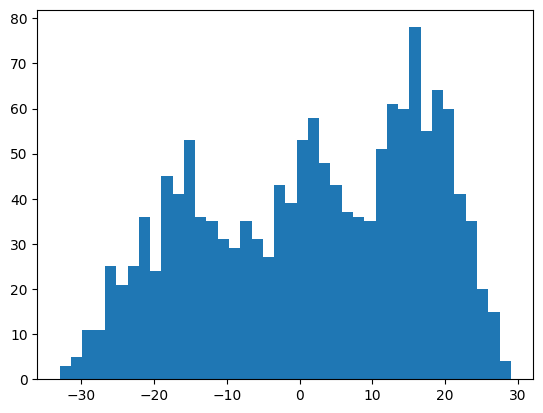

In [13]:
ds = df.sel(time=slice("2014-01-01", "2014-12-31"))
ds = ds.air[:,10,25]-273.15
plt.hist(ds,bins=40)

/tmp/ipython-input-2780418619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds, color='r')


<Axes: xlabel='air', ylabel='Density'>

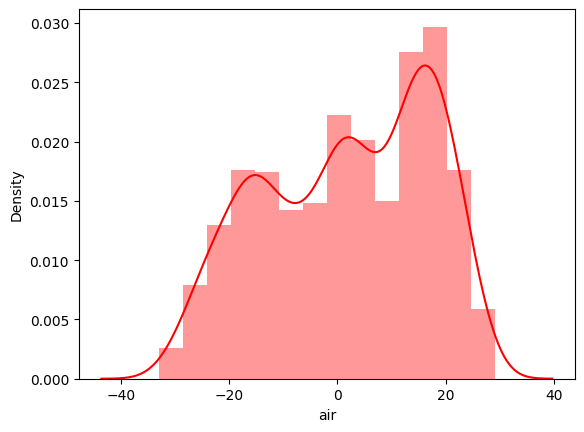

In [14]:
sns.distplot(ds, color='r')

/tmp/ipython-input-769608234.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_2, color='b')


<Axes: ylabel='Density'>

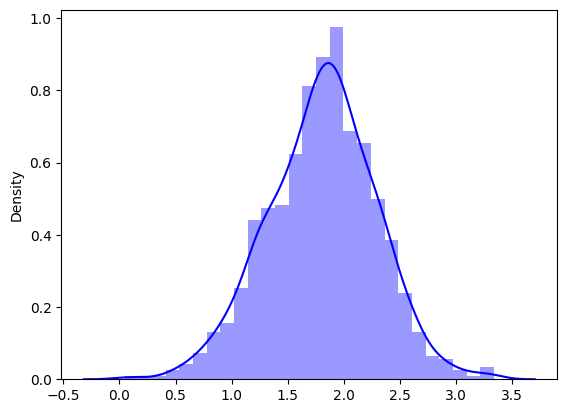

In [23]:
mean = []
def calc_sample_mean(sample_size, no_of_sample_means):
  for i in range(no_of_sample_means):
    sample_temperature = ds.isel(time=np.random.randint(0, ds.time.size, sample_size))
    sample_mean = sample_temperature.mean()
    #print(sample_mean)
    mean.append(sample_mean)
  return mean
mean_2=calc_sample_mean(sample_size=1000, no_of_sample_means=1000)
sns.distplot(mean_2, color='b')

In [24]:
%matplotlib inline
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import matplotlib.pyplot as plt                           # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
import seaborn as sns                                     # ddf plotting
import numpy as np                                        # working with arrays
import pandas as pd                                       # working with DataFrames
from scipy.stats import triang                            # parametric distributions
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import triang
from scipy.stats import probplot                        # visually check univariate Gaussianity
from scipy import stats                                   # statistical calculations
import random                                             # random drawing / bootstrap realizations of the data
import math                                               # square root operator
plt.rc('axes', axisbelow=True)                            # set axes and grids in the background for all plots

In [25]:
# added a convenience function for adding major and minor gridlines.
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

In [26]:
# Interactive Central Limit Theorem Demonstration
# interactive calculation of the sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                                                Central Limit Theorem Demonstration',layout=Layout(width='950px', height='30px'))
dist = widgets.Dropdown(
    options=['Uniform','Triangular','Gaussian'],
    value='Uniform',
    description='$F_X(x)$',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)
mean = widgets.FloatSlider(min=0.0, max = 1.0, value = 0.50, description = 'Mean',orientation='horizontal',layout=Layout(width='400px', height='30px'),continuous_update=False)
mean.style.handle_color = 'darkorange'
std = widgets.FloatSlider(min=0.01, max = 1.0, value = 0.10, step = 0.05, description = 'St.Dev.',orientation='horizontal',layout=Layout(width='400px', height='30px'),continuous_update=False)
std.style.handle_color = 'darkorange'
mini = widgets.FloatSlider(min = 0, max = 1.0, value = 0.25, description = 'Min.',orientation='horizontal',layout=Layout(width='400px', height='30px'),continuous_update=False)
mini.style.handle_color = 'darkorange'
maxi = widgets.FloatSlider(min = 0, max = 1.0, value = 0.75, description = 'Max.',orientation='horizontal',layout=Layout(width='400px', height='30px'),continuous_update=False)
maxi.style.handle_color = 'darkorange'
m = widgets.IntSlider(min = 1, max = 20, value = 1, description = '$m$ number in samples',orientation='horizontal',layout=Layout(width='400px', height='30px'),continuous_update=False)
m.style.handle_color = 'darkorange'
L = widgets.IntSlider(min = 1, max = 1000, value = 100, description = '$L$ number of Monte Carlo sim',orientation='horizontal',layout=Layout(width='400px', height='30px'),continuous_update=False)
L.style.handle_color = 'darkorange'


In [27]:
def update_dashboard(*args):
    if dist.value == 'Gaussian':
        mini.layout.display = "none"
        maxi.layout.display = "none"
        mean.layout.display = "flex"
        mean.description = 'Mean'
        std.layout.display = "flex"
    elif dist.value == "Uniform":
        mean.layout.display = "none"
        std.layout.display = "none"
        mini.layout.display = "flex"
        maxi.layout.display = "flex"
    elif dist.value == "Triangular":
        mean.layout.display = "flex"
        mean.description = 'Mode'
        std.layout.display = "none"
        mini.layout.display = "flex"
        maxi.layout.display = "flex"

dist.observe(update_dashboard,'value'); update_dashboard()

uia = widgets.HBox([dist,m,L],)                   # basic widget formatting
uib = widgets.HBox([mini,mean,std,maxi],)                   # basic widget formatting
ui2 = widgets.VBox([l,uia,uib],)

In [28]:
def f_make(dist,mean,std,mini,maxi, m, L):                       # function to take parameters, make sample and plot

    dataset = make_average_data(dist,mean,std,mini,maxi,m,L)

    plt.subplot(221)
    #sample = make_average_data(dist,mean,std,mini,maxi, m=1, L=10000)
    pdf = np.zeros(1000); pdf_avg_norm = np.zeros(1000)
    if dist == 'Uniform':
        minv = mini - (maxi-mini); maxv = maxi + (maxi-mini)
        pdf = stats.uniform.pdf(np.linspace(minv,maxv,1000),loc = mini,scale = maxi - mini)* 2 * L
    elif dist == 'Triangular':
        minv = mini; maxv = maxi
        pdf = stats.triang.pdf(np.linspace(minv,maxv,1000),loc = mini,c = (mean-mini)/(maxi-mini), scale = maxi-mini)* 2 * L
    elif dist == 'Gaussian':
        minv = mean - 4*std; maxv = mean + 4*std
        pdf = stats.norm.pdf(np.linspace(minv,maxv,1000),loc = mean, scale = std)* 2 * L

    #bins = np.linspace(minv,maxv,50)
    bins = np.linspace(0,1,50)
    #plt.hist(sample,alpha=0.6,color="darkorange",edgecolor="black",bins=bins)
    plt.plot(np.linspace(minv,maxv,1000),pdf,'--',color='black',linewidth = 3,zorder=10)
    plt.fill_between(np.linspace(minv,maxv,1000),pdf,np.full(1000,0),color='darkorange',alpha=0.6,zorder=1)
    #plt.xlim(minv,maxv)
    plt.xlim([0,1.0])
    plt.ylim(bottom=0); plt.title(r'$f_{X_i}(x)$'); plt.ylabel('Density'); plt.xlabel('$f_{X_i}(x)$'); add_grid()

    plt.subplot(222)
    plt.hist(dataset,alpha=0.6,color="darkorange",edgecolor="black",bins=bins,density = True,label='Monte Carlo')
    pdf_avg_norm = stats.norm.pdf(np.linspace(minv,maxv,1000),loc = np.average(dataset), scale = np.std(dataset))* 2 * L
    plt.plot(np.linspace(minv,maxv,1000),pdf_avg_norm/(2*L),color='black',linewidth = 2,label='Gaussian')
    sns.kdeplot(x=dataset,color = 'black',alpha = 0.8,levels = 1,bw_method=0.1,linewidth = 2,dashes = (5,2,1,2),label='Monte Carlo')
    ymin,ymax = plt.gca().get_ylim()
    plt.xlim(minv,maxv); plt.title(r'$f_Y$ vs. Gaussian PDF'); plt.ylabel('Frequency'); plt.xlabel(r'$Y$')
    plt.legend(loc='upper left')
    plt.ylim([0,ymax]); plt.xlim([0,1.0]); add_grid()
    plt.annotate(r'$Y= \frac{1}{m} \sum_{i=1}^m X_i$',xy=[0.05,ymax*0.75],size=14)

    plt.subplot(223)
    plt.hist(dataset,cumulative = True, density = True, alpha=0.6,color="darkorange",edgecolor="black", bins = bins, label = 'Monte Carlo')
    #plt.xlim(minv,maxv);
    plt.xlim([0,1.0])
    plt.ylim(0,1); plt.title(r'$F_Y$ vs. Gaussian CDF'); plt.xlabel(r'$Y$'); plt.ylabel('Cumulative Probability')
    cumul_prob = np.linspace(0.0,1.0,100)
    prop_values = norm.ppf(cumul_prob)
    prop_values = prop_values * np.std(dataset) + np.average(dataset)
    plt.plot(prop_values, cumul_prob, color = 'black',linewidth = 2,label = 'Gaussian')
    plt.plot(np.percentile(dataset,np.linspace(0.0,100.0,100)),np.linspace(0.0,100.0,100)/100,color='black',linewidth = 2, dashes = (5,2,1,2),label='Monte Carlo')
    plt.legend(loc='upper left'); add_grid()
    plt.annotate(r'$Y= \frac{1}{m} \sum_{i=1}^m X_i$',[0.05,0.75],size=14)

    plot4 = plt.subplot(224)
    probplot(dataset,plot=plot4)
    plot4.get_lines()[0].set_marker('p'); plot4.get_lines()[0].set_markerfacecolor('darkorange')
    plot4.get_lines()[0].set_markeredgecolor('black'); plot4.get_lines()[1].set_color('black')
    plt.title('Normal Probability Plot $Y$')
    plt.xlim([-3,3]); plt.ylim(0,1); add_grid(); plt.ylabel(r'Ordered $Y$')
    #plt.ylim([minv,maxv])

    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.3, hspace=0.2)
    plt.show()

In [29]:
def make_average_data(dist,mean,std,mini,maxi, m, L):            # function to check parameters and make samples
    average = 0.0; stdev = 0.0
    null_data = np.zeros(L)
    if dist == 'Uniform':
        if mini >= maxi:
            print('Invalid uniform distribution parameters')
            return null_data
        dataset = np.mean(uniform.rvs(size=[m,L], loc = mini, scale = maxi-mini, random_state = 73073),axis = 0)
        return dataset
    elif dist == 'Triangular':
        if mean <= mini or mean >= maxi or (maxi - mini) <= 0:
            print('Invalid triangular distribution parameters')
            return null_data
        dataset = np.mean(triang.rvs(size=[m,L], loc = mini, c = (mean-mini)/(maxi-mini), scale = (maxi-mini), random_state = 73073), axis = 0)
        return dataset
    elif dist == 'Gaussian':
        dataset = np.mean(norm.rvs(size=[m,L], loc = mean, scale = std, random_state = 73073), axis = 0)
        return dataset


In [30]:
# connect the function to make the samples and plot to the widgets
interactive_plot = widgets.interactive_output(f_make, {'dist': dist,'mean':mean,'std':std,'mini':mini,'maxi':maxi,'m': m,'L':L})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

In [31]:
display(ui2, interactive_plot)                            # display the interactive plot

Output()